# Telecom churn assignment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
master=pd.read_csv("/content/drive/MyDrive/telecom_churn/telecom_churn_data.csv")

In [5]:
## Checking the initial rows of the dataframe
master.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
## Size of the data being used
master.shape

(99999, 226)

In [7]:
# dropping telephone number as it is not needed for modelling, along with other columns with null values
master.drop(columns=['mobile_number','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],inplace=True)
## Size of the data being used
master.shape

(99999, 221)

In [8]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 221 entries, last_date_of_month_6 to sep_vbc_3g
dtypes: float64(176), int64(33), object(12)
memory usage: 168.6+ MB


In [9]:
## Statistical information of the numerical columns
master.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,5.619021,251.751489,248.731086,245.914311,245.934517,...,541.494013,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [10]:
# creating a dictionary for columns having nulls, along with the % nulls in that column
missing={}
for i in master.columns:
  if master[i].isnull().sum()>0:
    missing[i]=round(100*(master[i].isnull().sum()/master.shape[0]),2)

In [11]:
# checking out missing dictionary
missing

{'arpu_2g_6': 74.85,
 'arpu_2g_7': 74.43,
 'arpu_2g_8': 73.66,
 'arpu_2g_9': 74.08,
 'arpu_3g_6': 74.85,
 'arpu_3g_7': 74.43,
 'arpu_3g_8': 73.66,
 'arpu_3g_9': 74.08,
 'av_rech_amt_data_6': 74.85,
 'av_rech_amt_data_7': 74.43,
 'av_rech_amt_data_8': 73.66,
 'av_rech_amt_data_9': 74.08,
 'count_rech_2g_6': 74.85,
 'count_rech_2g_7': 74.43,
 'count_rech_2g_8': 73.66,
 'count_rech_2g_9': 74.08,
 'count_rech_3g_6': 74.85,
 'count_rech_3g_7': 74.43,
 'count_rech_3g_8': 73.66,
 'count_rech_3g_9': 74.08,
 'date_of_last_rech_6': 1.61,
 'date_of_last_rech_7': 1.77,
 'date_of_last_rech_8': 3.62,
 'date_of_last_rech_9': 4.76,
 'date_of_last_rech_data_6': 74.85,
 'date_of_last_rech_data_7': 74.43,
 'date_of_last_rech_data_8': 73.66,
 'date_of_last_rech_data_9': 74.08,
 'fb_user_6': 74.85,
 'fb_user_7': 74.43,
 'fb_user_8': 73.66,
 'fb_user_9': 74.08,
 'ic_others_6': 3.94,
 'ic_others_7': 3.86,
 'ic_others_8': 5.38,
 'ic_others_9': 7.75,
 'isd_ic_mou_6': 3.94,
 'isd_ic_mou_7': 3.86,
 'isd_ic_mou_8

In [12]:
#checking out features which have missing values
missing.keys()

dict_keys(['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_m

In [13]:
import copy
missing_temp = copy.deepcopy(missing) # creating a deep copy of missing, as we will need to loop over missing dict and remove keys with more than 50% nulls

# loop for dropping features with more than 50% null values
for i in missing_temp.keys():
  if missing_temp[i]>=50:
    master.drop(columns=i,inplace=True)
    missing.pop(i)
missing


{'date_of_last_rech_6': 1.61,
 'date_of_last_rech_7': 1.77,
 'date_of_last_rech_8': 3.62,
 'date_of_last_rech_9': 4.76,
 'ic_others_6': 3.94,
 'ic_others_7': 3.86,
 'ic_others_8': 5.38,
 'ic_others_9': 7.75,
 'isd_ic_mou_6': 3.94,
 'isd_ic_mou_7': 3.86,
 'isd_ic_mou_8': 5.38,
 'isd_ic_mou_9': 7.75,
 'isd_og_mou_6': 3.94,
 'isd_og_mou_7': 3.86,
 'isd_og_mou_8': 5.38,
 'isd_og_mou_9': 7.75,
 'last_date_of_month_7': 0.6,
 'last_date_of_month_8': 1.1,
 'last_date_of_month_9': 1.66,
 'loc_ic_mou_6': 3.94,
 'loc_ic_mou_7': 3.86,
 'loc_ic_mou_8': 5.38,
 'loc_ic_mou_9': 7.75,
 'loc_ic_t2f_mou_6': 3.94,
 'loc_ic_t2f_mou_7': 3.86,
 'loc_ic_t2f_mou_8': 5.38,
 'loc_ic_t2f_mou_9': 7.75,
 'loc_ic_t2m_mou_6': 3.94,
 'loc_ic_t2m_mou_7': 3.86,
 'loc_ic_t2m_mou_8': 5.38,
 'loc_ic_t2m_mou_9': 7.75,
 'loc_ic_t2t_mou_6': 3.94,
 'loc_ic_t2t_mou_7': 3.86,
 'loc_ic_t2t_mou_8': 5.38,
 'loc_ic_t2t_mou_9': 7.75,
 'loc_og_mou_6': 3.94,
 'loc_og_mou_7': 3.86,
 'loc_og_mou_8': 5.38,
 'loc_og_mou_9': 7.75,
 'loc_og_

In [14]:
master.shape
# this shows that there were over 40 columns with more than 50% null values

(99999, 181)

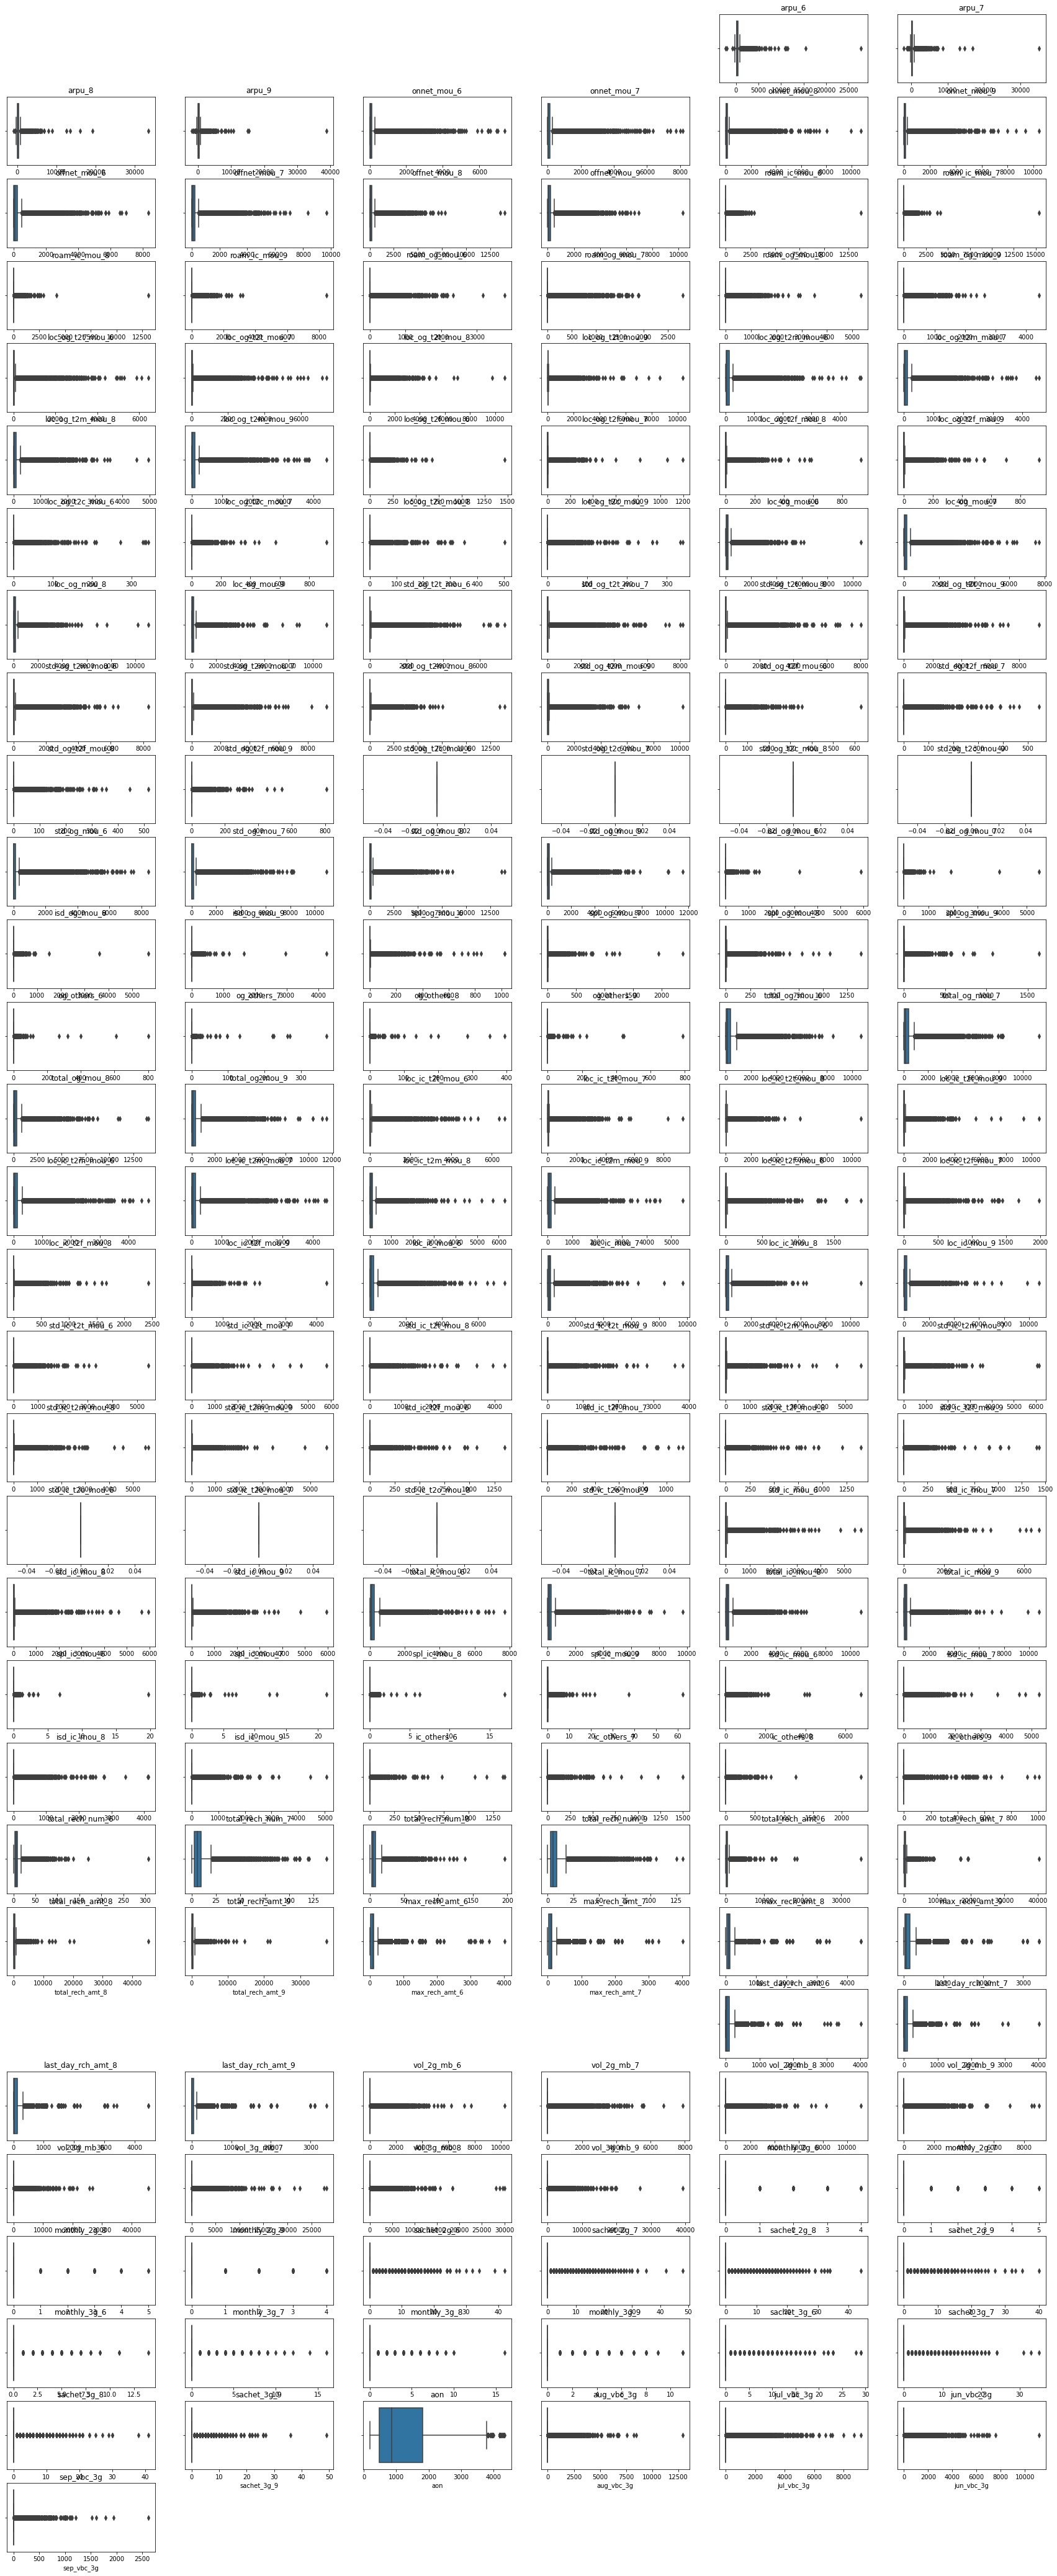

In [15]:
## Data distribution of numerical columns
plt.figure(figsize=(30,85))
for j,i in enumerate(master.columns):
    if master[i].dtype!='O':
        ax=plt.subplot(35,6,j+1)
        sns.boxplot(data=master,x=i)
        plt.title(i)
plt.show()
# The distribution of numerical cols have a lot of outliers in them, hence proceeding to impute them with median

In [16]:
# imputing features with low % missing values

for i in missing.keys():
  if master[i].dtype=='O': # imputing missing values with mode for categoric features
    master[i].fillna(master[i].mode()[0],inplace=True)
  else:
    master[i].fillna(master[i].median(),inplace=True) # imputing missing values with median for float features

  

In [17]:
# all null values imputed
master.isnull().sum()

last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
arpu_6                  0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 181, dtype: int64

In [18]:
### Identifying total recharge amt columns
for i in master.columns:
    if 'total_rech_amt' in i:
        print(i)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9


In [19]:
## Obtaining average recharge of month 6 and 7 from 'total_rech_amt_6' and 'total_rech_amt_7'
master['avg_rech_amt_6_and_7']=(master['total_rech_amt_6']+master['total_rech_amt_7'])/2

In [20]:
##Identifying 70th percentile to retain high value customers
percentile_seventy_avg_rech=np.quantile(master['avg_rech_amt_6_and_7'],0.7)

In [21]:
## 7oth percentile of the avg recharge amt of 6th and 7th months
percentile_seventy_avg_rech

368.5

In [22]:
## Extracting the dataframe that has high-value customer details
master=master[master['avg_rech_amt_6_and_7']>=percentile_seventy_avg_rech]

In [23]:
master

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,...,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_and_7
7,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,...,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,...,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,50,0,10,0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.00,0.00,0.49,0.00,...,130,130,6/20/2014,7/22/2014,8/30/2014,9/26/2014,110,50,0,0,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.00,0.00,0.00,0.00,...,130,220,6/30/2014,7/31/2014,8/14/2014,9/10/2014,100,100,130,220,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,30,130,6/30/2014,7/30/2014,8/25/2014,9/29/2014,30,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.269,410.614,290.851,330.963,5.01,142.59,97.61,206.19,329.58,500.14,355.48,196.51,5.06,0.00,0.00,0.00,46.04,0.00,0.00,0.00,5.01,131.71,76.83,148.56,7.83,32.31,59.84,48.71,0.16,0.00,1.21,0.00,0.00,7.00,20.85,0.00,...,67,67,6/30/2014,7/29/2014,8/23/2014,9/29/2014,30,50,30,67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,5,0,1,0,0,0,0,0

In [24]:
# defining the churn column based on month 9 trends

master.reset_index(drop=True,inplace=True)
master['target_churn']=""
for i in master.index:
    if (master.loc[i, 'total_ic_mou_9'] == 0) and (master.loc[i, 'total_og_mou_9'] == 0) and (master.loc[i, 'vol_2g_mb_9'] == 0) and (master.loc[i, 'vol_3g_mb_9'] == 0):
        master.loc[i,'target_churn']=1
    else:
        master.loc[i,'target_churn']=0
master.target_churn=master.target_churn.astype('int64')

In [25]:
## Percentage of customers who are likely to churn
(master.target_churn.sum()/master.shape[0])*100

8.64016527273333

In [26]:
## Dropping columns containing churn phase information(9th month) as the target col contains the needed information from it
for i in master.columns:
    if '9' in i:
        master.drop(i,axis=1,inplace=True)

In [27]:
## sept month col is dropped
master.drop('sep_vbc_3g',axis=1,inplace=True)

In [28]:
master.shape

(30011, 138)

#### Deriving avg of volume based consumption

In [29]:
## Obtaining the average of volume based consumption
master['avg_vbc_3g']=(master['aug_vbc_3g']+master['jul_vbc_3g']+master['jun_vbc_3g'])/3

In [30]:
master.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,...,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_and_7,target_churn,avg_vbc_3g
0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,...,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,31.953333
1,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,...,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,351.280000
2,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,...,6,4,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,0.000000
3,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,...,10,6,2,570,348,160,110,110,130,6/30/2014,7/31/2014,8/14/2014,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,8.113333
4,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,...,19,2,4,816,0,30,110,0,30,6/30/2014,7/30/2014,8/25/2014,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,408.0,0,0.000000


#### Identifying number of days between last recharges

In [31]:
master['days_btw_rech_6&7']=pd.to_datetime(master['date_of_last_rech_7'])-pd.to_datetime(master['date_of_last_rech_6'])

In [32]:
master['days_btw_rech_6&7']=master['days_btw_rech_6&7'].dt.days

In [33]:
master['days_btw_rech_7&8']=pd.to_datetime(master['date_of_last_rech_8'])-pd.to_datetime(master['date_of_last_rech_7'])

In [34]:
master['days_btw_rech_7&8']=master['days_btw_rech_7&8'].dt.days

In [35]:
master.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,...,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_and_7,target_churn,avg_vbc_3g,days_btw_rech_6&7,days_btw_rech_7&8
0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,...,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,31.953333,28,32
1,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,...,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,351.280000,36,30
2,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,...,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,0.000000,32,39
3,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,...,2,570,348,160,110,110,130,6/30/2014,7/31/2014,8/14/2014,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,8.113333,31,14
4,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,...,4,816,0,30,110,0,30,6/30/2014,7/30/2014,8/25/2014,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,408.0,0,0.000000,30,26


#### Estimating total avg revenue per customer

In [36]:
master['total_arpu']=master['arpu_6']+master['arpu_7']+master['arpu_8']

In [37]:
master.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_and_7,target_churn,avg_vbc_3g,days_btw_rech_6&7,days_btw_rech_7&8,total_arpu
0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,...,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,31.953333,28,32,5590.510
1,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,...,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,351.280000,36,30,1008.306
2,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,...,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,0.000000,32,39,1291.777
3,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,...,570,348,160,110,110,130,6/30/2014,7/31/2014,8/14/2014,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0,8.113333,31,14,918.738
4,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,...,816,0,30,110,0,30,6/30/2014,7/30/2014,8/25/2014,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,408.0,0,0.000000,30,26,734.487


### EDA

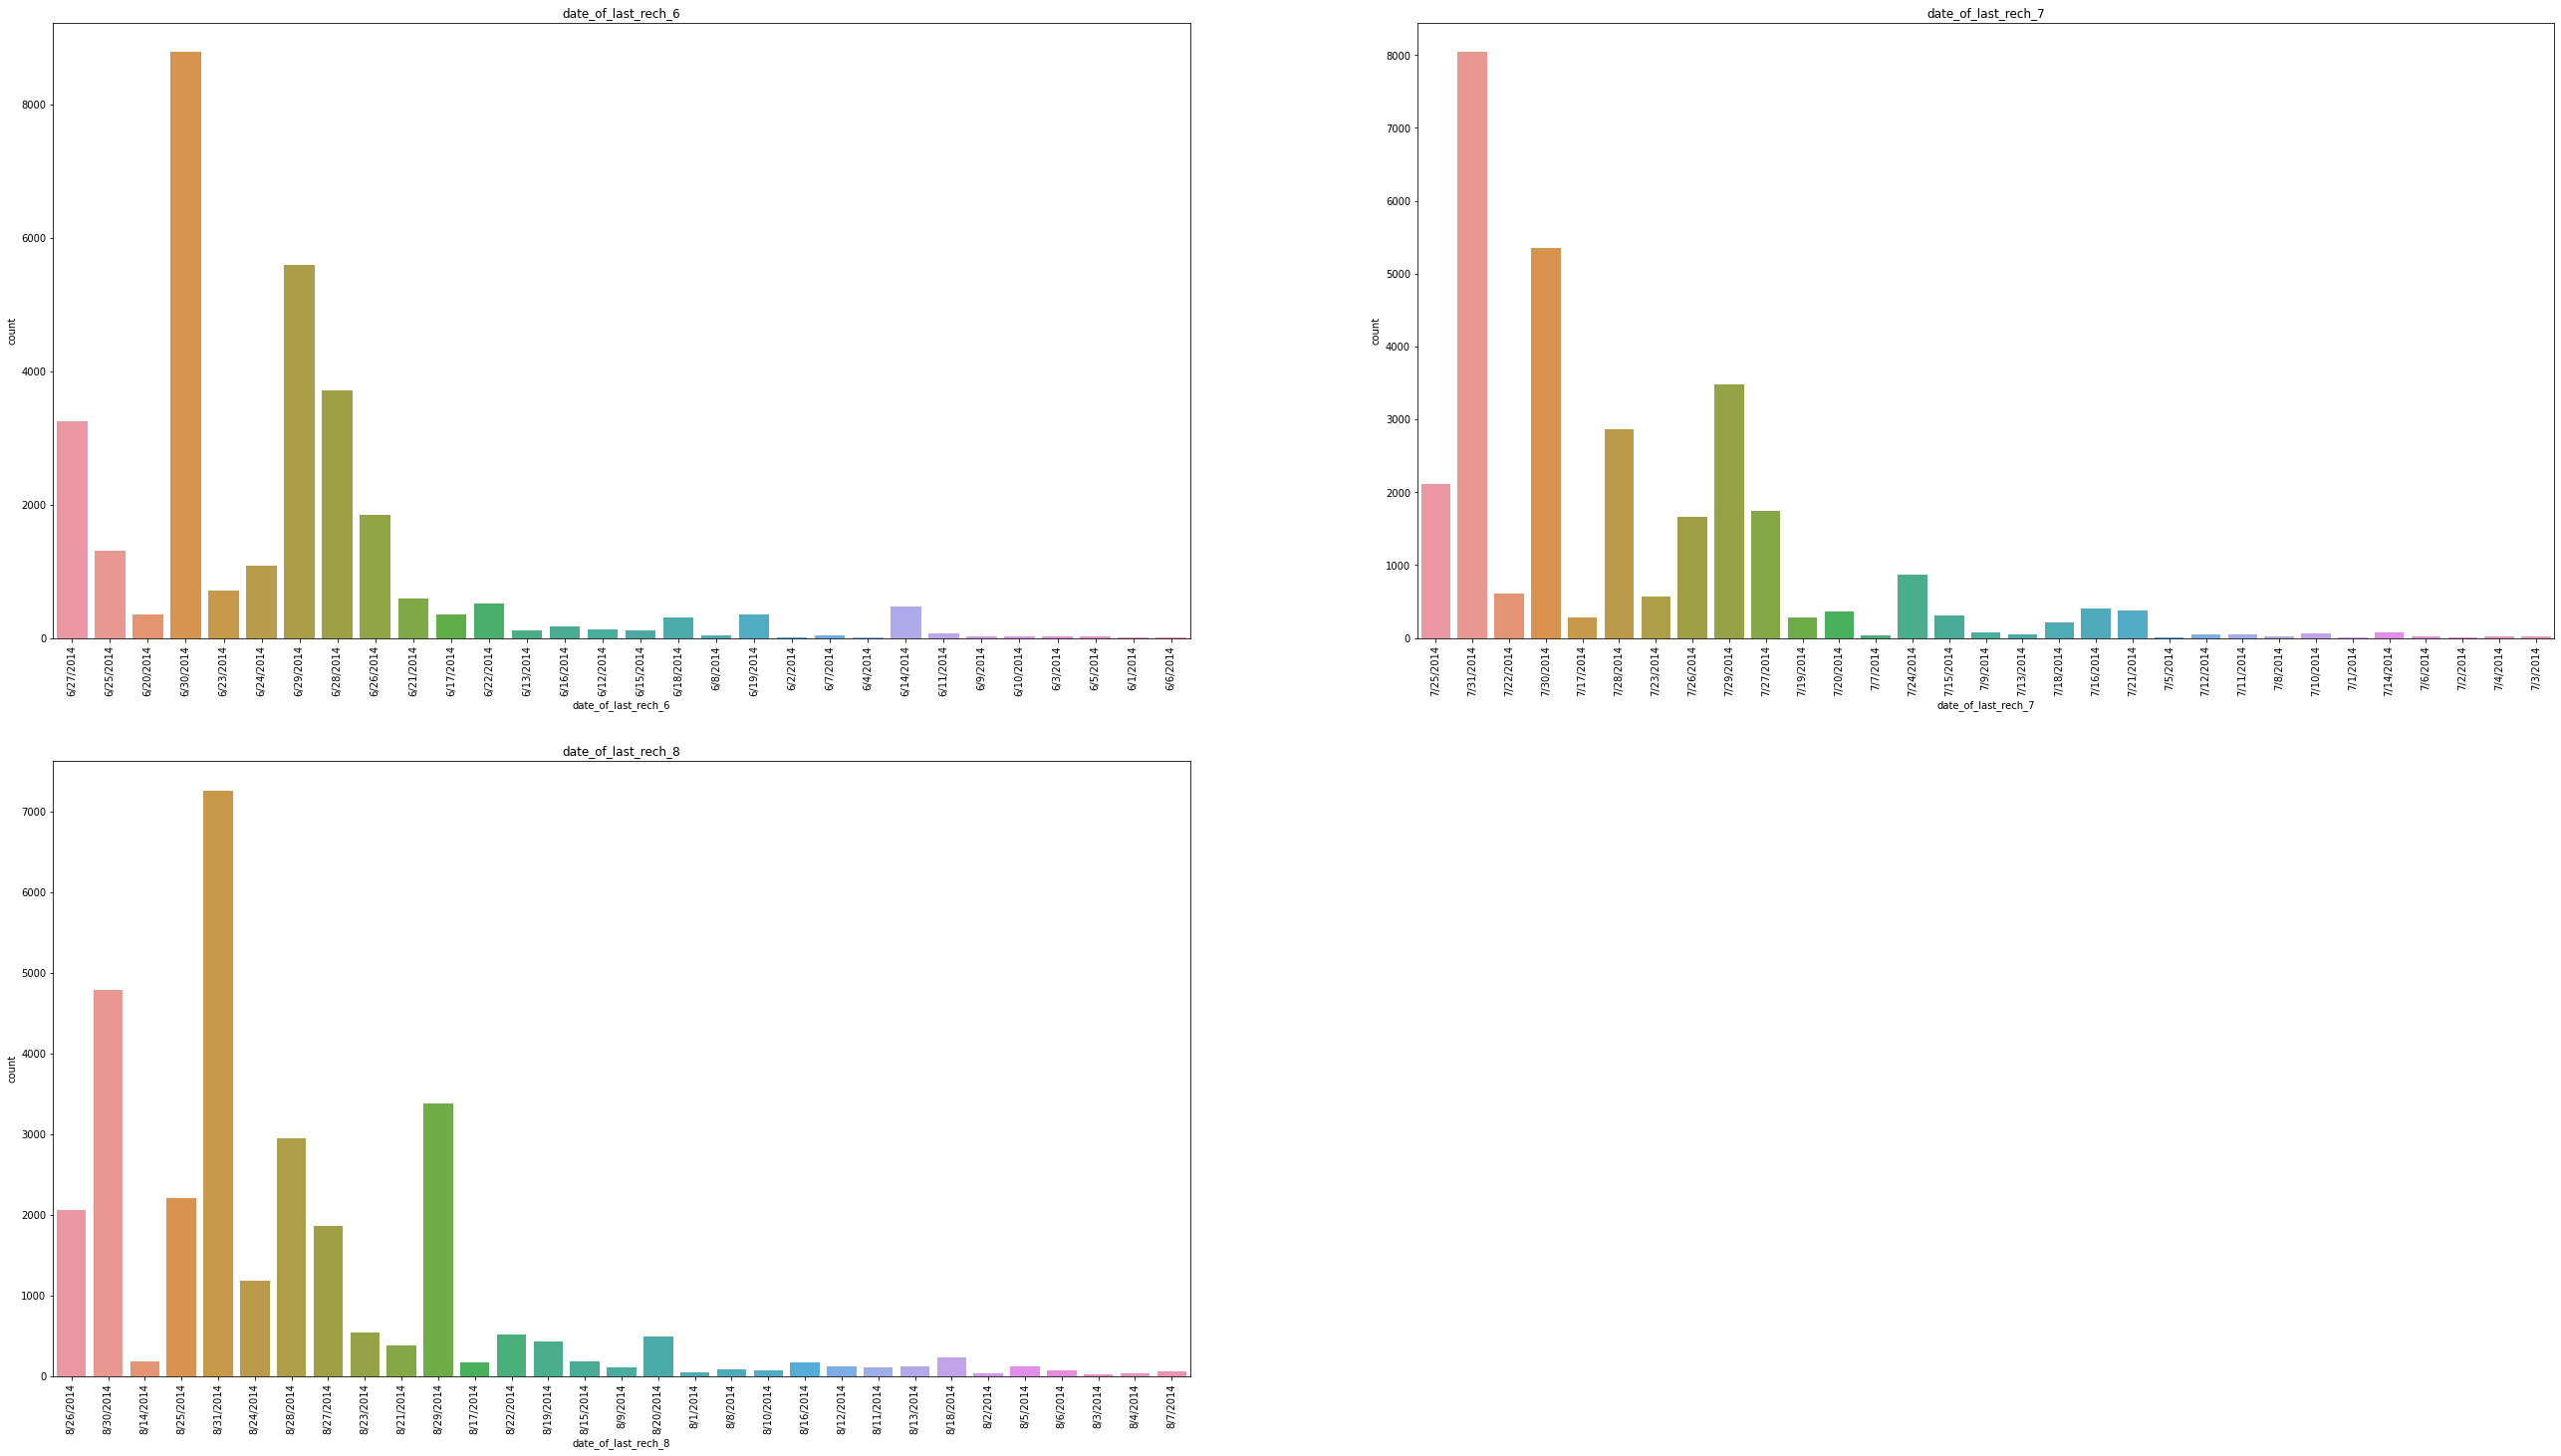

In [38]:
### Countplot for categorical columns
plt.figure(figsize=(45,25))
for j,i in enumerate(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']):
    plt.subplot(2,2,j+1)
    sns.countplot(master[i])
    plt.xticks(rotation='vertical')
    plt.title(i)
plt.show()

#### From the above plot it is evident that customers tend to recharge in high numbers, towards the end of the month than in the beginning

#### From the above box plot we see that the customers who tend to churn, show a reduction in the usage of telecom services as we reach the 8th month. This activity could very well help us identify them in early stages.

### Outlier treatment

In [39]:
master.select_dtypes(exclude='object').columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6_and_7',
       'target_churn', 'avg_vbc_3g', 'days_btw_rech_6&7', 'days_btw_rech_7&8',
       'total_arpu'],
      dtype='object', length=136)

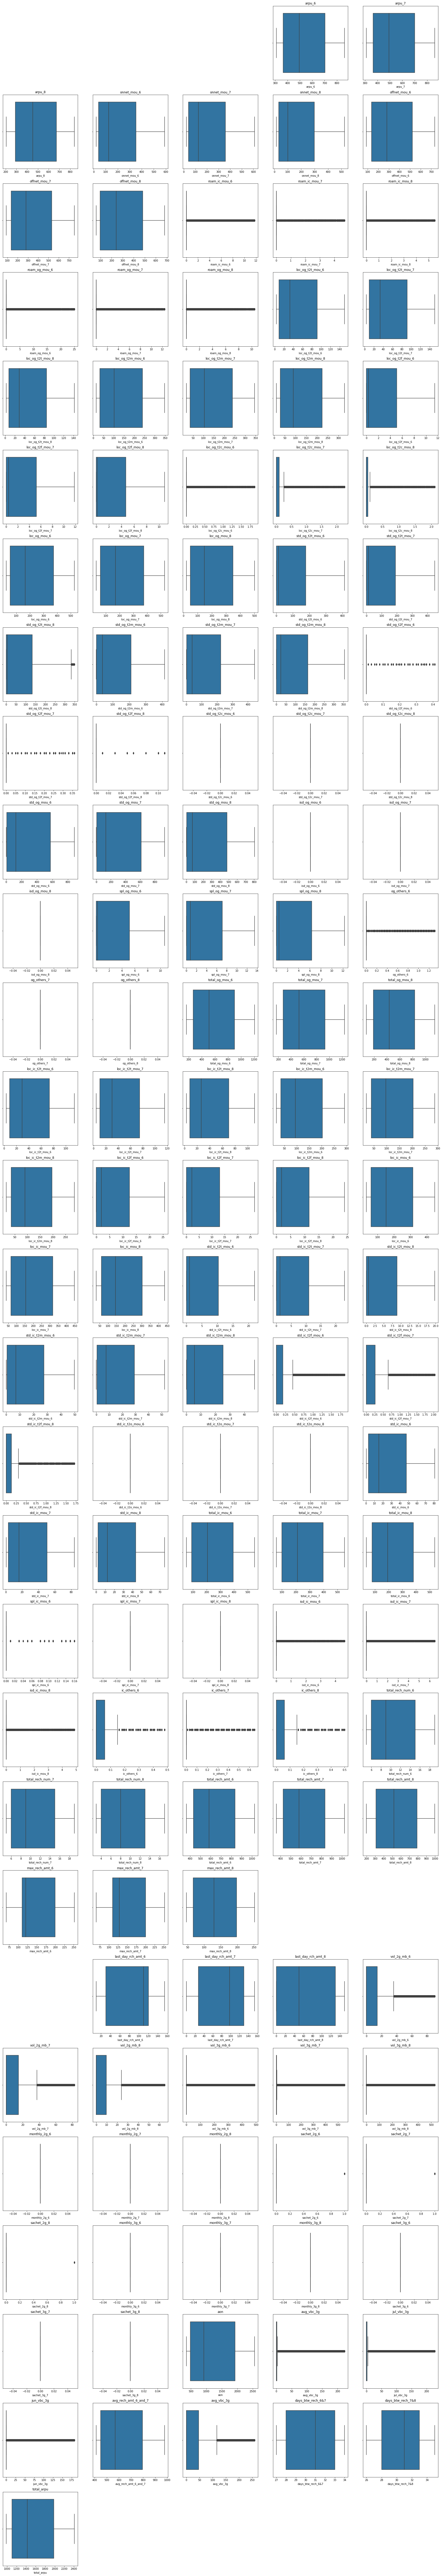

In [40]:
### Capping the lower and higher values between the range(15%-85%) in order to remove outliers
plt.figure(figsize=(30,250))
a=master.columns
b=list(a)
b.remove('target_churn') # removing target variable from list of all columns as we do not want to cap it.
for j,i in enumerate(b):
    if i in master.select_dtypes(exclude='object').columns:
        low,high=master[i].quantile([0.15,0.85])
        master[i]=master[i].clip(low,high)
        plt.subplot(40,5,j+1)
        sns.boxplot(master[i])
        plt.title(i)
plt.show()

In [41]:
# transforming features ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'] into ordinal categories as keeping them as objects would lead /n
# to almost 87 additional dummy features.

def func(x):
    if x>24:
        return 'Week 4'
    elif x>=17 and x<=24:
        return 'Week 3'
    elif x>=10 and x<17:
        return 'Week 2'
    else:
        return 'Week 1'

for i in ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']:
    master[i]=pd.to_datetime(master[i])
    master[i]=master[i].dt.day.apply(func)

master.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],inplace=True)

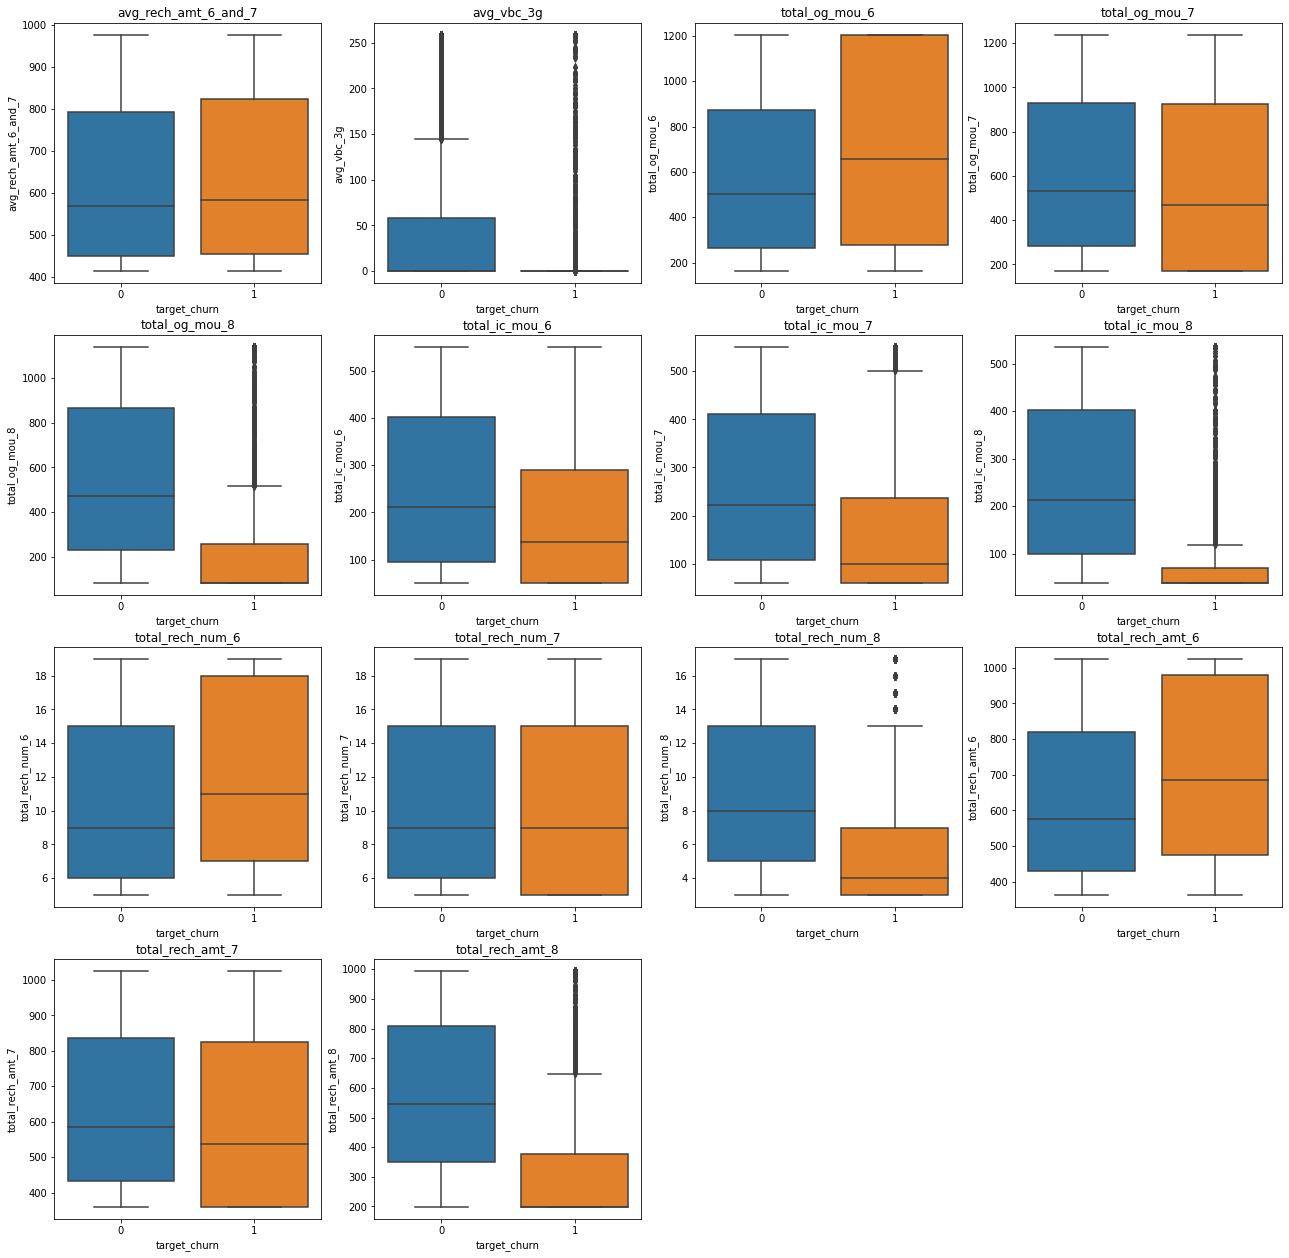

In [42]:
## Checking incoming,outgoing,rech_amt for customers
temp=master[['avg_rech_amt_6_and_7','avg_vbc_3g','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']]
plt.figure(figsize=(22,22))
for j,i in enumerate(temp.columns):
    plt.subplot(4,4,j+1)
    sns.boxplot(data=master,x='target_churn',y=master[i])
    plt.title(i)
plt.show()

In [43]:
master['target_churn'].value_counts()

0    27418
1     2593
Name: target_churn, dtype: int64

In [44]:
# defining categoric and numerical features for the processed dataset

#numerial_cols= [i for i in master.columns if master[i].dtype!='O']
#categoric_cols= [ i for i in master.columns if master[i].dtype=='O']

# Data pre preparation before linear classifier model building

## Checklist

- Variable transformation:
    - 1-hot encoding for numeric features (dummy variables)
    - Label Encoding for categoric features (categoric features)
- Train test split:
    - Scale train data set
    - Fit transform test dataset
- Check data for anomalies




In [45]:
# creating dummy variables for categorical features using pd.get_dummies
# not using categocial columns variable and then merging it to the dataframe, as pd.getdummies assigns dummies for categorical columns by default
master=pd.get_dummies(master)
master.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,...,date_of_last_rech_7_7/3/2014,date_of_last_rech_7_7/30/2014,date_of_last_rech_7_7/31/2014,date_of_last_rech_7_7/4/2014,date_of_last_rech_7_7/5/2014,date_of_last_rech_7_7/6/2014,date_of_last_rech_7_7/7/2014,date_of_last_rech_7_7/8/2014,date_of_last_rech_7_7/9/2014,date_of_last_rech_8_8/1/2014,date_of_last_rech_8_8/10/2014,date_of_last_rech_8_8/11/2014,date_of_last_rech_8_8/12/2014,date_of_last_rech_8_8/13/2014,date_of_last_rech_8_8/14/2014,date_of_last_rech_8_8/15/2014,date_of_last_rech_8_8/16/2014,date_of_last_rech_8_8/17/2014,date_of_last_rech_8_8/18/2014,date_of_last_rech_8_8/19/2014,date_of_last_rech_8_8/2/2014,date_of_last_rech_8_8/20/2014,date_of_last_rech_8_8/21/2014,date_of_last_rech_8_8/22/2014,date_of_last_rech_8_8/23/2014,date_of_last_rech_8_8/24/2014,date_of_last_rech_8_8/25/2014,date_of_last_rech_8_8/26/2014,date_of_last_rech_8_8/27/2014,date_of_last_rech_8_8/28/2014,date_of_last_rech_8_8/29/2014,date_of_last_rech_8_8/3/2014,date_of_last_rech_8_8/30/2014,date_of_last_rech_8_8/31/2014,date_of_last_rech_8_8/4/2014,date_of_last_rech_8_8/5/2014,date_of_last_rech_8_8/6/2014,date_of_last_rech_8_8/7/2014,date_of_last_rech_8_8/8/2014,date_of_last_rech_8_8/9/2014
0,861.611,859.9595,839.422,57.840,54.68,52.290,453.43,567.160,325.910,11.74,4.71,5.48,23.74,12.38,10.435,51.39,31.38,40.28,308.63,345.305,162.28,11.44,11.84,10.83,0.0,0.0,0.00,422.16,527.05,255.79,4.30,23.29,12.01,49.89,31.76,49.14,0.41,0.36,0.11,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,378.721,492.2230,205.521,413.690,351.03,35.080,94.66,87.725,136.480,0.00,0.00,0.00,0.00,0.00,0.000,150.46,150.35,12.49,80.96,70.580,50.54,0.00,0.00,0.00,0.0,0.0,2.10,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,492.846,311.3325,593.260,501.760,108.39,523.535,413.31,119.280,482.460,11.74,4.71,5.48,7.98,12.38,1.440,49.63,6.19,36.01,151.13,47.280,294.46,4.54,0.00,10.83,0.0,0.0,0.49,205.31,53.48,353.99,413.16,85.98,348.90,255.36,52.94,156.94,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,430.975,311.3325,205.521,50.510,74.01,70.610,296.29,229.740,162.760,0.00,2.83,0.00,0.00,12.38,0.000,42.61,65.16,67.38,273.29,145.990,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,690.008,311.3325,205.521,589.255,21.39,14.785,87.46,87.725,60.475,0.00,4.71,4.81,0.00,8.46,10.435,38.99,3.78,2.15,58.54,17.110,10.70,0.00,0.00,0.00,0.0,0.0,0.00,97.54,29.73,19.97,413.16,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# splitting dataframe in test and train data frames
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(master, random_state=100, train_size=0.8,stratify=master['target_churn'])

In [47]:
print(df_train.shape)
print(df_test.shape)

(24008, 228)
(6003, 228)


In [48]:
# splitting train/test dataframes into X/y
y_train=df_train.pop('target_churn')
X_train=df_train
y_test=df_test.pop('target_churn')
X_test=df_test

# defining categorical/numerical features list for scaling
categorical_features=[i for i in X_train.columns if X_train[i].dtype=='O']
numerical_features=[i for i in X_train.columns if X_train[i].dtype!='O' ]

In [49]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit-transforming X_train
X_train[numerical_features]=scaler.fit_transform(X_train[numerical_features])
# transforming X_test
X_test[numerical_features]=scaler.transform(X_test[numerical_features])

# MODEL 1: Logistic Regression
### Model details:
    - Linear Logistic Regression
    - Feature selection using RFE
    - Optimal cuttoff relection using ROC-AUC
    - Classfification report on train vs test
    - Interpretations from the model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [51]:
# Applying RFE to find out top 20 features
log_reg=LogisticRegression()
rfe=RFE(log_reg,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [52]:
# storing important columns from rfe.support_
imp_cols=list(X_train.columns[rfe.support_])
imp_cols

['arpu_6',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'date_of_last_rech_8_8/30/2014',
 'date_of_last_rech_8_8/31/2014']

In [53]:
# finding out contribution of each important column
X_train_sm=sm.add_constant(X_train[imp_cols])
log_model=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
resulting_model=log_model.fit()
resulting_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           target_churn   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23987
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4328.1
Date:                Wed, 02 Mar 2022   Deviance:                       8656.3
Time:                        08:30:06   Pearson chi2:                 1.50e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.9914      0.059    -67.103      0.000      -4.108      -3.875
arpu_6                            0.2997      0.028     10.654      0.000       0.245       0.355
roam_og_mou_8                     0.4356      0.024     17.936      0.000       0.388       0.483
loc_og_t2m_mou_8                 -0.3800      0.062     -6.167      0.000      -0.501      -0.259
loc_ic_t2t_mou_8                 -0.5807      0.078     -7.407      0.000      -0.734      -0.427
loc_ic_t2m_mou_8                 -0.8027      0.127     -6.323      0.000      -1.052      -0.554
loc_ic_t2f_mou_8                 -0.3751      0.055     -6.823      0.000      -0.483      -0.267
loc_ic_mou_7                     -0.3494      0.100     -3.508      0.000      -0.545      -0.154
loc_ic_mou_8                      3.2883      0.233     14.098      0.000       2.831       3.745
std_ic_t2t_mou_8                 -0.4356      0.060     -7.287      0.000      -0.553      -0.318
std_ic_t2m_mou_8                 -0.6705      0.087     -7.735      0.000      -0.840      -0.501
std_ic_t2f_mou_8                 -0.3257      0.052     -6.250      0.000      -0.428      -0.224
std_ic_mou_8                      1.0820      0.112      9.671      0.000       0.863       1.301
total_ic_mou_7                    0.6283      0.093      6.782      0.000       0.447       0.810
total_ic_mou_8                   -2.9909      0.201    -14.910      0.000      -3.384      -2.598
total_rech_num_8                 -0.3682      0.038     -9.786      0.000      -0.442      -0.294
last_day_rch_amt_8               -0.7239      0.037    -19.626      0.000      -0.796      -0.652
vol_2g_mb_8                      -0.3795      0.049     -7.741      0.000      -0.476      -0.283
vol_3g_mb_8                      -0.4629      0.055     -8.438      0.000      -0.570      -0.355
date_of_last_rech_8_8/30/2014    -0.4302      0.046     -9.336      0.000      -0.521      -0.340
date_of_last_rech_8_8/31/2014    -0.3023      0.033     -9.095      0.000      -0.367      -0.237
=================================================================================================
"""

## Key interpretations from the model:

### Top 5 features which indicate higher chance of churn:
      - Average revenue per user in month 6
      - Roaming outgoing usage (mou) in month 8
      - Local incoming usage (mou) in month 8
      - STD incoming usage (mou) in month 8
      - Total incoming usage (mou) in month 7

### Top 5 features which lead to user retention:
      - Total incoming calls in month 8
      - Last day recharge amount in month 8
      - Volume of 3g recharge in month 8
      - Local incoming t2t usage (mou) in month 8
      - Local outgoing t2m usage (mou) in month 8


### Key recommendations:
      - The above mentioned metrics are great indicators of churn/no churn
      - The company should prioritise reaching out to customers who have had less average revenue per user in month 6
      - Company should prioritise reaching out to customers who have had low local incoming calls in month 8
      - The company should focus on reaching out to customers who have had less STD incoming usage
      - The company need not focus on customers who have had high volumes of 3g rechare
      - The company need not focus on users who do a high recharge on the last day of month 8



In [54]:
# predicting on train data set
y_train_pred=resulting_model.predict(X_train_sm)

In [55]:
## Printing model predictions at 0.5 cutoff
train_pred_vs_churn=pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
train_pred_vs_churn['CustID_index']=y_train.index
train_pred_vs_churn['Predicted_churn_at_0.5']=train_pred_vs_churn['Churn_prob'].apply(lambda x: 1 if x>0.5 else 0)
train_pred_vs_churn.set_index('CustID_index',inplace=True)
train_pred_vs_churn

,Churn,Churn_prob,Predicted_churn_at_0.5
CustID_index,,,
25623,0,0.001634,0
4983,1,0.488961,0
15587,0,0.003084,0
3611,0,0.032926,0
16273,0,0.002165,0
...,...,...,...
22382,0,0.012523,0
8009,0,0.069291,0
13082,0,0.060970,0


In [56]:
# confusion matrix for 0.5 cutoff
confusion_matrix(train_pred_vs_churn.Churn,train_pred_vs_churn['Predicted_churn_at_0.5'])

array([[21525,   409],
       [ 1184,   890]])

In [57]:
# classification report at 0.5 cutoff
print(classification_report(train_pred_vs_churn.Churn,train_pred_vs_churn['Predicted_churn_at_0.5']))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     21934
           1       0.69      0.43      0.53      2074

    accuracy                           0.93     24008
   macro avg       0.82      0.71      0.75     24008
weighted avg       0.93      0.93      0.93     24008



In [58]:
print(accuracy_score(train_pred_vs_churn.Churn,train_pred_vs_churn['Predicted_churn_at_0.5']))
# model gives 93% accuracy on train at 0.5 cutoff, however we have not check ROC score which is a better evaluation metric for Logistic regression

0.9336471176274576


In [59]:
#Optimising cutoffs

cut_offs= [float(i)/100 for i in range(1,20,2)]
for i in cut_offs:
    train_pred_vs_churn[i]=train_pred_vs_churn.Churn_prob.apply(lambda x: 1 if x>i else 0)
train_pred_vs_churn.head()

,Churn,Churn_prob,Predicted_churn_at_0.5,0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19
CustID_index,,,,,,,,,,,,,
25623,0,0.001634,0,0,0,0,0,0,0,0,0,0,0
4983,1,0.488961,0,1,1,1,1,1,1,1,1,1,1
15587,0,0.003084,0,0,0,0,0,0,0,0,0,0,0
3611,0,0.032926,0,1,1,0,0,0,0,0,0,0,0
16273,0,0.002165,0,0,0,0,0,0,0,0,0,0,0


In [60]:
#function for plotting ROC curve
def plot_roc(actual,pred):
    # metrics.roc_curve returns 3 arrays, an array of the tpr, the fpr and a threshold array such that ith element of tpr/fpr is defined at a trheshold given by threshold[i]
    fpr,tpr,threshold=roc_curve(actual,pred,drop_intermediate=False)
    auc_score=roc_auc_score(actual,pred)                                # metrics.roc_auc_score is essentially the area under that curve
    plt.figure(figsize=(16,9))                                                  # defining the figure size of the plot as 16:9
    plt.plot(fpr,tpr,label=f'roc area under curve- {round(auc_score,2)}')       # plotting tpr on y-axis and fpr on x-axis
    plt.plot([0,1],[0,1],'g--')                                                 # plotting the 45 degree line
    plt.xlim([0.0, 1.0])                                                        # defining the x axis limits
    plt.ylim([0.0, 1.05])                                                       # defining the y axis limits
    plt.xlabel('False Positive Rate or [1 - Specificity or True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

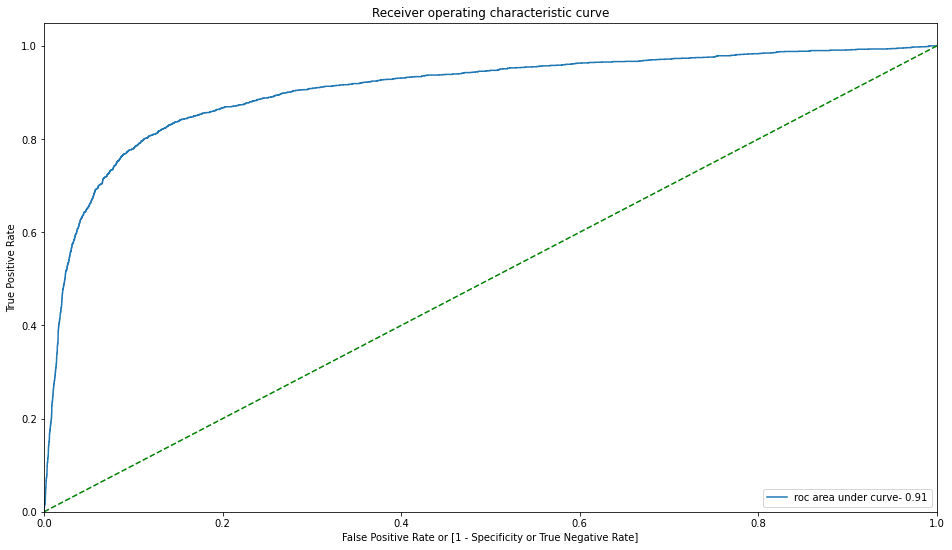

In [61]:
# ROC curve at 0.5 cutoff
plot_roc(train_pred_vs_churn.Churn,train_pred_vs_churn.Churn_prob)

In [62]:
# Creating a dataframe for classification evaluation metrics at different cutoffs ranging from 0.01 to 0.2
threshold=pd.DataFrame(columns=['threshold','tpr','fpr','specific','accuracy','roc_score'])
for i in cut_offs:
    confusion=confusion_matrix(train_pred_vs_churn["Churn"],train_pred_vs_churn[i])
    tpr=confusion[1,1]/(confusion[1,0]+confusion[1,1])
    fpr=confusion[0,1]/(confusion[0,0]+confusion[0,1])
    specific=1-fpr
    accuracy=accuracy_score(train_pred_vs_churn["Churn"],train_pred_vs_churn[i])
    roc_score=roc_auc_score(train_pred_vs_churn["Churn"],train_pred_vs_churn[i])
    threshold.loc[i]=[i,tpr,fpr,specific,accuracy,roc_score]
threshold

,threshold,tpr,fpr,specific,accuracy,roc_score
0.01,0.01,0.959981,0.583523,0.416477,0.463429,0.688229
0.03,0.03,0.918997,0.350643,0.649357,0.672651,0.784177
0.05,0.05,0.888139,0.247470,0.752530,0.764245,0.820335
0.07,0.07,0.860656,0.190800,0.809200,0.813645,0.834928
0.09,0.09,0.842816,0.155147,0.844853,0.844677,0.843834
0.11,0.11,0.818708,0.130710,0.869290,0.864920,0.843999
0.13,0.13,0.801350,0.113066,0.886934,0.879540,0.844142
0.15,0.15,0.779171,0.099891,0.900109,0.889662,0.839640
0.17,0.17,0.767599,0.089222,0.910778,0.898409,0.839188
0.19,0.19,0.745419,0.080469,0.919531,0.904490,0.832475


<Figure size 1152x648 with 0 Axes>

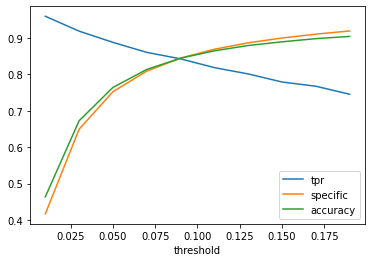

In [63]:
#Plotting precision vs recall 
plt.figure(figsize=(16,9))
threshold.plot.line(x='threshold',y=['tpr','specific','accuracy'])
plt.show()

In [64]:
# Therefore by using the roc scores and precision recall curves, 0.11 is a good cutoff score
# applying on test data set

In [65]:
X_test_sm=sm.add_constant(X_test[imp_cols])
y_test_pred=resulting_model.predict(X_test_sm)

In [66]:
# This is the dataframe that has the y_test actuals, y_test_pred probabilities and then predicted churn based on our logsitic regression at 0.11 cutoff
log_reg_test=pd.DataFrame({'Churn':y_test.values,'Churn_prob':y_test_pred})
log_reg_test['CustID_index']=y_test.index
log_reg_test['Predicted_churn_at_0.11']=log_reg_test['Churn_prob'].apply(lambda x: 1 if x>0.11 else 0)
log_reg_test.set_index('CustID_index',inplace=True)
log_reg_test

,Churn,Churn_prob,Predicted_churn_at_0.11
CustID_index,,,
3010,0,0.002917,0
9917,0,0.053560,0
24681,0,0.026655,0
22123,0,0.064818,0
20436,0,0.167556,1
...,...,...,...
3337,0,0.228939,1
9504,0,0.136807,1
10238,0,0.001983,0


In [67]:
# Classification report at 0.11 cutoff on testing dataset
print(classification_report(log_reg_test.Churn,log_reg_test['Predicted_churn_at_0.11']))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5484
           1       0.37      0.83      0.51       519

    accuracy                           0.86      6003
   macro avg       0.68      0.85      0.72      6003
weighted avg       0.93      0.86      0.89      6003



In [68]:
# ROC AUC score for test vs train dataset are very much similar at around 0.84
print("ROC AUC score for test dataset:",roc_auc_score(log_reg_test.Churn,log_reg_test["Predicted_churn_at_0.11"]))
print("ROC AUC score for training dataset:",roc_auc_score(train_pred_vs_churn.Churn,train_pred_vs_churn[0.11]))

ROC AUC score for test dataset: 0.8468287145368766
ROC AUC score for training dataset: 0.8439987491183993


In [69]:
## END OF MODEL 1 (LOGISTIC REGRESSION with PCA)

# MODEL 2 (L1 Logistic Regression using PCA)
    - Using Grid Search CV to find out the best lambda/alpha along with penalty type (l1 or l2)
    - Performing PCA on the train/test dataset
    - Using ROC AUC to determine model performance


In [70]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.decomposition import PCA

## Retaining 90% of variance of the datapoints
pca=PCA(0.9,random_state=42)
## Fitting and transforming on the train set
pca_X_train=pca.fit_transform(X_train)
## Transformation on the test set
pca_X_test=pca.transform(X_test)

In [71]:
# using gridsearch CV to define the best possible cost function, Ridge or Lasso, along with max iterations
advanced_reg=LogisticRegression()
param_grid=[{
            'penalty':['l1','l2'],
            'C':np.logspace(-4,4,20),
            'solver':['liblinear'],
            'max_iter':[100,1000,2000]
            }
            ]
          

In [72]:
# applying the grid search CV on PCA training datasets pca_X_train,y_train
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(advanced_reg,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1,scoring='roc_auc')
best_clf=clf.fit(pca_X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


In [73]:
# printing the best estimator of the grid search CV
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, max_iter=2000, penalty='l1',
                   solver='liblinear')

In [74]:
# from the above it is clear to use l1 or Lasso regression will give us best results going forward
advanced_reg_final=best_clf.best_estimator_

In [75]:
# accuracy score of Lasso regression on train dataset
y_train_pred=advanced_reg_final.predict(pca_X_train)
print('accuracy score of best estimator on train dataset:',accuracy_score(y_train,y_train_pred))

accuracy score of best estimator on train dataset: 0.9242335888037321


In [77]:
# predicting on the test dataset and printing accuracy score
y_test_pred=advanced_reg_final.predict(pca_X_test)
print('accuracy score of best estimator on test dataset:',accuracy_score(y_test,y_test_pred))

accuracy score of best estimator on test dataset: 0.9220389805097451


In [79]:

# ROC score of of best L1 estimator on test dataset
print('roc_score of best estimator on test dataset using L1:',roc_auc_score(y_test,y_test_pred))

roc_score of best estimator on test dataset using L1: 0.645076797240949


# Model 3: Random Forest Classifier
  - Using the dataset on which we performed PCA
  - Using Randomised search CV


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [81]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [82]:
# defining Cross validation parameters
params={'max_depth':[5,10,15,20],
        'min_samples_split':[5,10,15],
        'max_features':[3,4,5]
    
}

In [83]:
### Using randomizedsearch to obtain optimal hyperparameter values
randomsearch=RandomizedSearchCV(rf,params,n_jobs=-1,cv=3,verbose=True)

In [84]:
# fitting on data
randomsearch=randomsearch.fit(pca_X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [85]:
## Identifying best estimator
randomsearch.best_estimator_

RandomForestClassifier(max_depth=20, max_features=5, min_samples_split=10,
                       n_jobs=-1, random_state=42)

In [86]:
## Building the model with best estimator values
rf=RandomForestClassifier(random_state=42,max_depth=15,max_features=4,min_samples_split=5,n_jobs=-1)

In [87]:
rf=rf.fit(pca_X_train,y_train)

In [88]:
rf_train_pred=rf.predict(pca_X_train)

In [89]:
rf_test_pred=rf.predict(pca_X_test)

In [103]:
### Calculating accuracy score for train data
print('Accuracy score on train set',accuracy_score(y_train,rf_train_pred))
### Accuracy score of test data 
print('Accuracy score on test set',accuracy_score(y_test,rf_test_pred))
### ROC AUC score of test data 
print('ROC AUC score on test set',roc_auc_score(y_test,rf_test_pred))


Accuracy score on train set 0.9508913695434855
Accuracy score on test set 0.914376145260703
ROC AUC score on test set 0.5117946901759401


# Model 4: AdaBoost Classifier
      - Using the dataset on which we performed PCA

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
## Taking decision tree to be the weak learner
decision_tree=DecisionTreeClassifier(max_depth=2,random_state=42)
decision_tree=decision_tree.fit(pca_X_train,y_train)

In [93]:

accuracy_score(y_test,decision_tree.predict(pca_X_test))

0.9135432283858071

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
## Checking for various estimators
n_est=list(range(1,50,5))

In [96]:
## Fitting model against different estimators to find optimum estimator value
ada_scores=[]
for i in n_est:
  adaboost=AdaBoostClassifier(base_estimator=decision_tree,n_estimators=i,random_state=42)
  adaboost.fit(pca_X_train,y_train)
  ada_pred=adaboost.predict(pca_X_test)
  score=accuracy_score(y_test,ada_pred)
  ada_scores.append(score)

In [97]:
## Estimators and their scores
for i,j in enumerate(n_est):
  print(j,ada_scores[i])

1 0.9135432283858071
6 0.9160419790104948
11 0.9165417291354323
16 0.9148758953856405
21 0.9167083125104115
26 0.914376145260703
31 0.9132100616358487
36 0.9135432283858071
41 0.9133766450108279
46 0.9147093120106613


In [98]:
## Building adaboost classifier with the best estimator
ada_boost=AdaBoostClassifier(base_estimator=decision_tree,n_estimators=21,random_state=42)

In [99]:
ada_boost.fit(pca_X_train,y_train)
ada_train_pred=ada_boost.predict(pca_X_train)

In [100]:
ada_test_pred=ada_boost.predict(pca_X_test)

In [101]:
print('accuracy of adaboost on train set',accuracy_score(y_train,ada_train_pred))
print('accuracy of adaboost on test set',accuracy_score(y_test,ada_test_pred))

accuracy of adaboost on train set 0.923942019326891
accuracy of adaboost on test set 0.9167083125104115


In [102]:
print('roc_auc score of adaboost on train set',roc_auc_score(y_train,ada_train_pred))
print('roc_auc score of adaboost on test set',roc_auc_score(y_test,ada_test_pred))

roc_auc score of adaboost on train set 0.6955607332209656
roc_auc score of adaboost on test set 0.6744312408562165


# Summary of the 4 models:
  - Model 1: Logistic regression without PCA performed the best when comparing evaluation metric of ROC_AUC scores across all models at 84%, but had only 85% accuracy. 
  - Model 2: Logistic regression with PCA and L1 (Lasso regularisation) performed the best on test dataset with 92% accuracy, however ROC_AUC score stood at 64%, which is not great.
  - Model 3: Random forest classifier with PCA, performed well on the accuracy on the test dataset with 91% accuracy, however ROC_AUC score stood at 51% which is poor, implying a high level of false negatives which can be dangerous for our business prediction
  - Model 4: Adaboost classifier with PCA, performed well on the accuracy on the test dataset with 91%, with and ROC_AUC score of 67%, which is the second best in all the models. 

Recommendation: At least for this business use case, we should proceed with Logistic regression without PCA if we consider ROC_AUC as a top metric, ROC scores of other classifiers like Advanced regression, Random Forests and Adaboosts can be improved by greater hyperparameter tuning, however as model interpretability is important, we need to consider the tradeoffs of doing so for the black box models mentioned above